Enter the number of trials (n):  15
Enter the probability for success (p):  .4


╒═════╤═════════════╤═════════════╕
│ k   │ p(X=k)      │ p(X≤k)      │
╞═════╪═════════════╪═════════════╡
│ 0   │ 0.000470185 │ 0.000470185 │
├─────┼─────────────┼─────────────┤
│ 1   │ 0.00470185  │ 0.00517203  │
├─────┼─────────────┼─────────────┤
│ 2   │ 0.021942    │ 0.027114    │
├─────┼─────────────┼─────────────┤
│ 3   │ 0.0633879   │ 0.0905019   │
├─────┼─────────────┼─────────────┤
│ 4   │ 0.126776    │ 0.217278    │
├─────┼─────────────┼─────────────┤
│ 5   │ 0.185938    │ 0.403216    │
├─────┼─────────────┼─────────────┤
│ 6   │ 0.206598    │ 0.609813    │
├─────┼─────────────┼─────────────┤
│ 7   │ 0.177084    │ 0.786897    │
├─────┼─────────────┼─────────────┤
│ 8   │ 0.118056    │ 0.904953    │
├─────┼─────────────┼─────────────┤
│ 9   │ 0.0612141   │ 0.966167    │
├─────┼─────────────┼─────────────┤
│ 10  │ 0.0244856   │ 0.990652    │
├─────┼─────────────┼─────────────┤
│ 11  │ 0.00741989  │ 0.998072    │
├─────┼─────────────┼─────────────┤
│ 12  │ 0.00164886  │ 0.9997

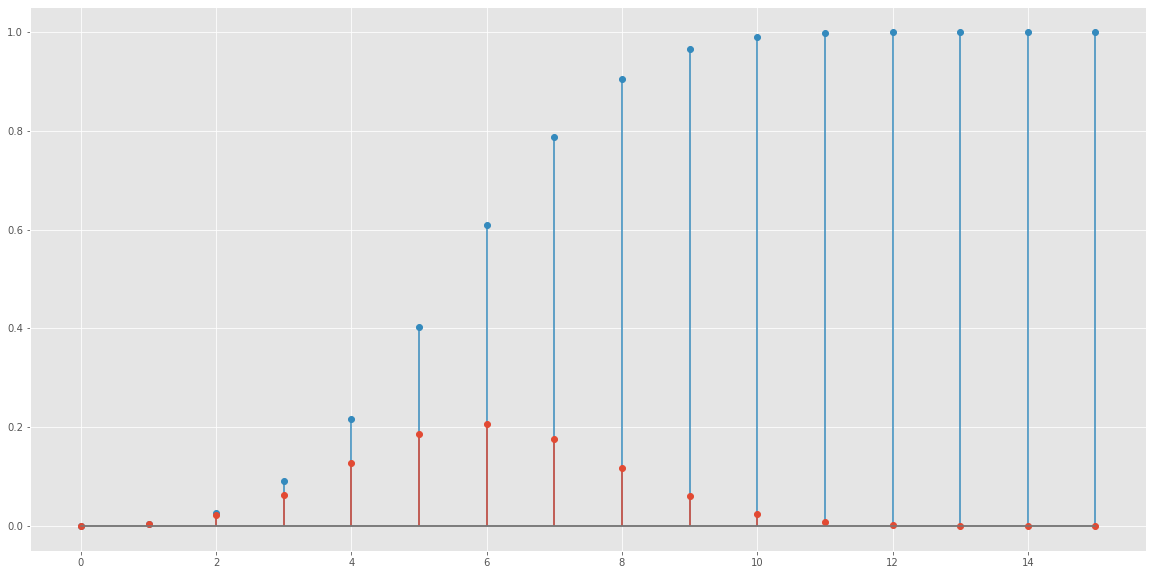

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import binom
from tabulate import tabulate
from time import strftime

# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# setting the parameters
n= int(input("Enter the number of trials (n): ")) # number of trials
p= float(input("Enter the probability for success (p): "))  # probablity for success

a = []
for k in range(0,n+1):
    a.append([k, binom.pmf(k,n,p), binom.cdf(k, n, p, loc=0)])

headers = ["k", "p(X=k)", "p(X≤k)"]

# tabulate data
table = tabulate(a, headers, tablefmt="fancy_grid", numalign="left")
# output
print(table)

# Convert table to a string
s_tab=str(table)


# get a date-time string for the document name
s_now=strftime("%y%m%d%H%M%S")


# Open file to write
f = open("binomial_data.txt", "w")
f.write(s_tab)
f.close()


r_values=list(range(n+1))
dist=[binom.pmf(r,n,p) for r in r_values] # PDF
cdist=[binom.cdf(r,n,p) for r in r_values] # CDF

# Plot the graph
plt.stem(r_values, cdist, linefmt='C1', markerfmt='C1o') #plot CDF
plt.stem(r_values, dist, linefmt='C0',markerfmt='C0o') # plot PDF
plt.savefig('pdf_cdf_plot.pdf')
plt.show()
